<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_TwitterAPI_CleanText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de texto

Si quiero reutilizar algunas funciones desarrolladas en la notebook anterior, podemos importarla desde el drive

In [4]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=78dabdcaeb9fb6560d9452d5659c115a94d3eef425d67fd5b47173afcd6fe163
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [5]:
%cd "/content/drive/My Drive/Colab Notebooks"
import import_ipynb

/content/drive/My Drive/Colab Notebooks


In [7]:
from DA_TwitterAPI_Scraping import connect_Twitter

In [8]:
filename="/content/drive/My Drive/_Credentials/credencials_API_twitter.json"
api=connect_Twitter(filename)

ibonetc estás conectado a la API de Twitter


In [9]:
import tweepy
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import collections
import csv
import numpy as np
import re

Cargando datos del home de CaracolTV

In [ ]:
screen_name="CaracolTV"
df = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date', 'hashtags','mentions'])
i=0
for tweet in tweepy.Cursor(api.user_timeline, screen_name=screen_name, since = "2020-08-01", lang="es", tweet_mode='extended').items(3000):
  df.loc[i, 'tweet'] = tweet.full_text
  df.loc[i, 'user'] = tweet.user.name
  df.loc[i, 'user_followers'] = tweet.user.followers_count
  df.loc[i, 'user_location'] = tweet.user.location
  df.loc[i, 'fav_count'] = tweet.favorite_count
  df.loc[i, 'rt_count'] = tweet.retweet_count
  df.loc[i, 'tweet_date'] = tweet.created_at
  ## tomar los hashtag y los usuarios que se mencionan
  hashtag=None
  mentions=None
  if hasattr(tweet, "entities"):
    entities = tweet.entities
    if "hashtags" in entities:
      hashtag=[ent["text"] for ent in entities["hashtags"] if ent is not None and "text" in ent and ent["text"] is not None]
    if "user_mentions" in entities:
      mentions=[ent["screen_name"] for ent in entities["user_mentions"] if ent is not None and "screen_name" in ent and ent["screen_name"] is not None]  
  df.loc[i, 'hashtags']=hashtag
  df.loc[i, 'mentions']=mentions
  i+=1

Guardar a un csv

In [ ]:
path='/content/drive/My Drive/Analitics_Esp/'
df.to_csv(path+'CaracolTV_.csv', encoding='utf-8-sig')

Leer de csv

In [ ]:
pd.set_option('display.max_colwidth',2000)
path='/content/drive/My Drive/Analitics_Esp/'
df = pd.read_csv(path+'CaracolTV_.csv', encoding='utf-8-sig')

In [90]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tweets_clean,tokens,tokens_clean,lemmas,tokens_stem
0,0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",[],"['ven', 'mejor', 'gorditas', 'sé', 'perjuicio'...","['ven', 'mejor', 'gorditas', 'sé', 'perjuicio'...","['ver', 'mejor', 'gorditas', 'ser', 'perjuicio...","['ven', 'mejor', 'gordit', 'se', 'perjuici', '..."
1,1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez...",[],"['saludos', 'ministro']","['saludos', 'ministro']","['saludo', 'ministro']","['salud', 'ministr']"
2,2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'...",[],"['gran', 'trabajo', 'ciclistas', 'etapa', 'hoy...","['gran', 'trabajo', 'ciclistas', 'etapa', 'hoy...","['gran', 'trabajar', 'ciclista', 'etapa', 'hoy...","['gran', 'trabaj', 'ciclist', 'etap', 'hoy', '..."
3,3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",[],"['favor', 'nesesitamos', 'ayuda', 'pasando', '...","['favor', 'nesesitamos', 'ayuda', 'pasando', '...","['favor', 'nesesitamos', 'ayudar', 'pasar', 's...","['favor', 'nesesit', 'ayud', 'pas', 'situacion..."
4,4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ...",[],"['ud', 'quiere', 'legalizar', 'mierda', 'ayuda...","['ud', 'quiere', 'legalizar', 'mierda', 'ayuda...","['ud', 'querer', 'legalizar', 'mierda', 'ayuda...","['ud', 'quier', 'legaliz', 'mierd', 'ayud', 'm..."


Otra opción es cargar los datos donde mencionen a Caracol, pero que no sea de un usuario de caracol.

In [ ]:
query="@CaracolTV -filter:retweets"
df = pd.DataFrame(columns = ['tweet', 'user', 'user_followers', 'user_location', 'fav_count', 'rt_count', 'tweet_date', 'hashtags','mentions'])
i=0
for tweet in tweepy.Cursor(api.search, query, since = "2020-08-01", lang="es", tweet_mode='extended').items():
  if re.search(r'caracol', tweet.user.name.lower())== None:
    df.loc[i, 'tweet'] = tweet.full_text
    df.loc[i, 'user'] = tweet.user.name
    df.loc[i, 'user_followers'] = tweet.user.followers_count
    df.loc[i, 'user_location'] = tweet.user.location
    df.loc[i, 'fav_count'] = tweet.favorite_count
    df.loc[i, 'rt_count'] = tweet.retweet_count
    df.loc[i, 'tweet_date'] = tweet.created_at
    ## tomar los hashtag y los usuarios que se mencionan
    hashtag=None
    mentions=None
    if hasattr(tweet, "entities"):
      entities = tweet.entities
      if "hashtags" in entities:
        hashtag=[ent["text"] for ent in entities["hashtags"] if ent is not None and "text" in ent and ent["text"] is not None]
      if "user_mentions" in entities:
        mentions=[ent["screen_name"] for ent in entities["user_mentions"] if ent is not None and "screen_name" in ent and ent["screen_name"] is not None]  
    df.loc[i, 'hashtags']=hashtag
    df.loc[i, 'mentions']=mentions
    i+=1
  if i>3000: break

In [ ]:
min(df.tweet_date)

datetime.datetime(2020, 8, 24, 7, 2, 17)

In [ ]:
path='/content/drive/My Drive/Analitics_Esp/'

In [ ]:
df.to_csv(path+'SearchCaracolTV_.csv', encoding='utf-8-sig')

In [ ]:
df=pd.read_csv(path+'SearchCaracolTV_.csv', encoding='utf-8-sig')

In [ ]:
df.head(10)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,@CaracolTV @Regias Se ven mejor gorditas... Yo no sé porque el perjuicio de la delgadez si así gorditas se ven muy bien.,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,@LucenErnesto @NairoQuinCo @SupermanlopezN @Eganbernal @CaracolTV @infopresidencia @MinDeporteCol @fedeciclismocol Y a las 3:30 en @WinSportsTV #CiclismoEntreGrandes saludos Ministro.,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']"
2,2,"🚴🏾‍♂️Gran trabajo de nuestros ciclistas en la etapa de hoy: @NairoQuinCo 4, @SupermanlopezN 6 y @Eganbernal 7 🇨🇴. ¡Entregándolo todo hasta el final! #TourDeFrancia 🇫🇷 @CaracolTV https://t.co/Y1gFUFMwF9",Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']"
3,3,@CaracolTV @Regias Por favor nesesitamos ayuda estamos pasando por una situación muy difícil no tengo comida para mis Niños ayudennos por favor nesesitamos alimentacion 😭🙏,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,@CarlosFGalan @COL_EJERCITO Pero ud quiere que legalizar esa mierda !! Y con ayuda de los medios afines al terrorismo como . @CaracolTV ? Que tal le párese esta fabulosa información sesgada al terrorismo ? @ghitis @ArgiroCasta58 @CancinoAbog https://t.co/DWo15jbwyX,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', 'ghitis', 'ArgiroCasta58', 'CancinoAbog']"
5,5,@CaracolTV que bueno seria que volviera el programa cine arte que todos los viernes por la noche siempre habia una nueva película para ver y que mejor que lo conduzca @LUISCARLOSRUEDA un experto en cine https://t.co/A627AeHwAQ,camilo muete🇨🇴,63,BOGOTA COLOMBIA,0,0,2020-09-01 15:48:05,[],"['CaracolTV', 'LUISCARLOSRUEDA']"
6,6,"@CaracolTV @CaracolPlay Con este texto, pensé q hablaban de testigos contra AUV",Rocio,132,NaN,0,0,2020-09-01 15:43:11,[],"['CaracolTV', 'CaracolPlay']"
7,7,"@Pfrobledo @elespectador @CaracolTV @CaracolRadio @NoticiasRCN @NoticiasUno @BluRadioCo @orozco_angela @WRadioColombia los aviones del descaro , este gobierno no le corre sangre por la cara, les corre por los campos",Hector Poveda Moreno,13,NaN,0,0,2020-09-01 15:42:20,[],"['Pfrobledo', 'elespectador', 'CaracolTV', 'CaracolRadio', 'NoticiasRCN', 'NoticiasUno', 'BluRadioCo', 'orozco_angela', 'WRadioColombia']"
8,8,"@CaracolTV @Regias Son actrices de 3 categoría y presumen mansiones y camionetas, será que trabajan en Hollywood?",Alexis Gómez,27,Medellin,1,0,2020-09-01 15:39:47,[],"['CaracolTV', 'Regias']"
9,9,"@VickyDavilaH y por los medios como @CaracolTV que su noticia ""MUEREN"" y no lo califica como asesinato o masacre. Medios politizados, idiogilizados y lo peor, el asesinato de nuestros ""HEROES"", por este @CaracolTV es una noticia sin importancia... que asco produce.",Jhonyo,83,"Manhattan, NY",0,0,2020-09-01 15:39:27,[],"['VickyDavilaH', 'CaracolTV', 'CaracolTV']"


Cantidad de likes

In [ ]:
import plotly.express as px
fig = px.line(df, x='tweet_date', y='fav_count')
fig.show()

Con una expresión regular podemos buscar las menciones de usuarios que en Twitter comienzan con @.

Si tenemos los datos en un dataframe este tiene algunas funciones para, a partir de una expresión regular, buscar patrones, sustituir textos.

**str.contains(exp_regular)**: Devuelve verdero si encuentra el patrón en el texto

**str.findall(exp_regular)**: Devuelve la lista de los patrones encontrados.



In [ ]:
df.tweet.str.contains(r'@\w+') #El tweet menciona a algun usuario

0       True
1       True
2       True
3       True
4       True
        ... 
1823    True
1824    True
1825    True
1826    True
1827    True
Name: tweet, Length: 1828, dtype: bool

In [ ]:
screen_names_list=df.tweet.str.findall(r"@\w+").sum()# Aplanar la lista

In [ ]:
screen_names = set(df.tweet.str.findall(r"@\w+").sum())
screen_names

{'@WRADIOCOLOMBlA',
 '@RCNnovelas',
 '@tele_rebelde',
 '@ObsesionadaNaMi',
 '@Contagioradio1',
 '@SabadosFelices',
 '@EFprocycling',
 '@VarskySports',
 '@CConstitucional',
 '@USAID_Colombia',
 '@PublimetroCol',
 '@ONUMujeres',
 '@cnncolombia',
 '@CaracolBogota',
 '@ExpFinalTV',
 '@angelacianuro',
 '@bettorojas',
 '@CaracolTvIntl',
 '@AUGUSTOOCAMPO',
 '@vuelos_ya',
 '@tatislondono',
 '@spotify',
 '@sergiocarlo',
 '@ActualidadRT',
 '@DuvanGonzalez_D',
 '@EstupinanYansen',
 '@BBC',
 '@PachoSantosC',
 '@MaluPeriodista',
 '@Alejo_Manrique',
 '@adn40',
 '@RUNT_OFICIAL',
 '@PoliticaET',
 '@WinSportsTV',
 '@AliciaOrtegah',
 '@28patito28',
 '@Octasasso',
 '@TDTColombiaTV',
 '@darcyquinnr',
 '@invimacolombia',
 '@colombia',
 '@sabadosfelices',
 '@pau13_3',
 '@HeinerBernal',
 '@jcpilonieta',
 '@CDHVitoria',
 '@UWCL',
 '@Germanjm7806',
 '@HeroeRava',
 '@8RonaldQuintero',
 '@cienciaplus',
 '@EcuadorTV',
 '@DeportesRCN',
 '@27leguas',
 '@violentmeow',
 '@camipaisa1',
 '@juliherrerap',
 '@montanertwi

In [ ]:
tweets_names = pd.DataFrame()
for name in screen_names:
  tweets_names[name.replace('@', '')] = df.tweet.str.contains(name)

In [ ]:
tweets_names

,WRADIOCOLOMBlA,RCNnovelas,tele_rebelde,ObsesionadaNaMi,Contagioradio1,SabadosFelices,EFprocycling,VarskySports,CConstitucional,USAID_Colombia,PublimetroCol,ONUMujeres,cnncolombia,CaracolBogota,ExpFinalTV,angelacianuro,bettorojas,CaracolTvIntl,AUGUSTOOCAMPO,vuelos_ya,tatislondono,spotify,sergiocarlo,ActualidadRT,DuvanGonzalez_D,EstupinanYansen,BBC,PachoSantosC,MaluPeriodista,Alejo_Manrique,adn40,RUNT_OFICIAL,PoliticaET,WinSportsTV,AliciaOrtegah,28patito28,Octasasso,TDTColombiaTV,darcyquinnr,invimacolombia,...,ANIABELLO_R,PluralidadZ,TVCOLEncuesta,DonJediondo,FelicianoValen,PrimeraSenado,laredcaracoltv,JuanitaGomezL,TVChileTVN,Canales3y7,glen_2501,arjoseortiz,carlosvives,cecialdo,LAURI_MOLINA,Marlon_Moreno_S,ConcejoDeBogota,MauroToroO,GustavoBolivar,Amparo_Grisales,divajessurum,ELCLARINDECHILE,TVN,RappiColombia,carolinacruz15,Centralista101,DanielSamperO,miguel_____14,LuIsManM,ClaraLopezObre,ArgiroCasta58,NASA_es,lanuevaprensaco,informador,Sachaka7,TatianaZuluagaL,pachoaguilarc,cesarlopezmusic,dfgiron,Colombia
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
words, freqs=np.unique(np.array(screen_names_list),return_counts=True)

In [ ]:
import plotly.express as px
fig = px.bar(x=words, y=freqs)
fig.show()

In [ ]:
name_counts = tweets_names.sum(axis=0).sort_values(ascending=False)

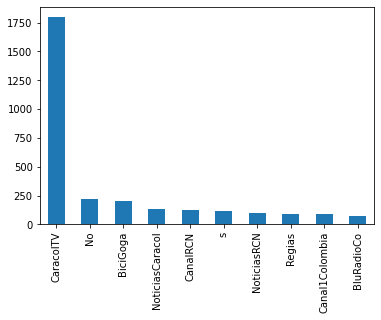

In [ ]:
name_counts[0:10].plot.bar()

In [ ]:
print(df.tweet[1])
print(df.mentions[1])

Vía @SabadosFelices | Uno de los Viejitos Sordos está molesto porque del asilo no les han dicho nada para celebrar el Día del Adulto Mayor, y por eso se reunió virtualmente con su amigo, pero como siempre, terminó un poco molesto porque no le entendía nada https://t.co/0ClSPWBNKB https://t.co/MYB5ja7tLs
['SabadosFelices']


In [ ]:
import numpy as np
mentions=np.array([])
for m in df.mentions:
  mentions=np.append(mentions,m)
mentions

array(["['CaracolTV', 'Regias']",
       "['LucenErnesto', 'NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV', 'infopresidencia', 'MinDeporteCol', 'fedeciclismocol', 'WinSportsTV']",
       "['NairoQuinCo', 'SupermanlopezN', 'Eganbernal', 'CaracolTV']",
       ..., "['CaracolTV']",
       "['michelbrownmike', 'jpshuk', 'kristililley', 'RTItelevision', 'CaracolTV', 'Telemundo']",
       "['CaracolTV']"], dtype='<U324')

In [ ]:
pd_count_mentions=pd.value_counts(mentions)

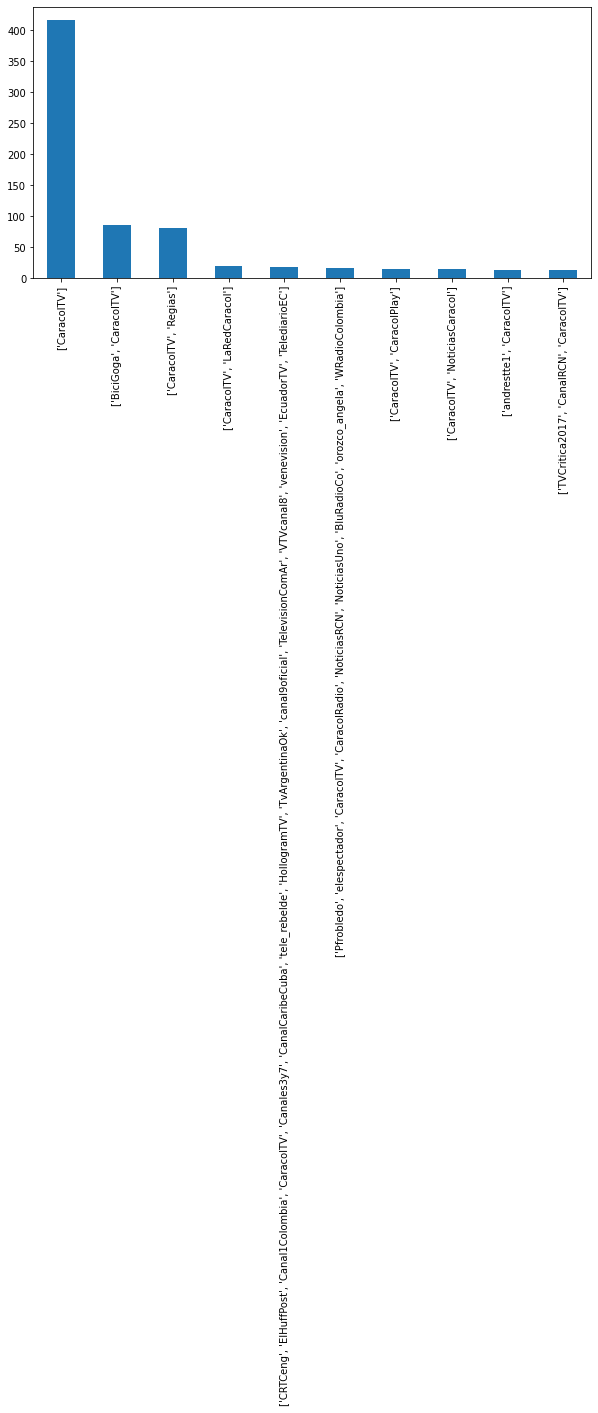

In [ ]:
plt.figure(figsize=(10,5))
pd_count_mentions[:10].plot.bar()

In [ ]:
count_mentions=np.unique(mentions, return_counts=True)
count_mentions

(array(["['27leguas', 'CarlosS82074261', 'IvanDuque', 'CapitanSantiag0', 'CapitanAirWolf', 'ElRepublicano09', 'juanrobertovarg', 'NoticiasCaracol', 'CaracolTV']",
        "['28patito28', 'CRTCeng', 'ElHuffPost', 'Canal1Colombia', 'CaracolTV', 'Canales3y7', 'CanalCaribeCuba', 'tele_rebelde', 'HollogramTV', 'TvArgentinaOk', 'canal9oficial', 'TelevisionComAr', 'VTVcanal8', 'venevision', 'EcuadorTV', 'TelediarioEC']",
        "['28patito28', 'CRTCeng', 'ElHuffPost', 'Canal1Colombia', 'CaracolTV', 'Canales3y7', 'CanalCaribeCuba', 'tele_rebelde', 'HollogramTV', 'TvArgentinaOk']",
        "['8RonaldQuintero', 'BiciGoga', 'CaracolTV', 'SenalColombia', 'letour_col']",
        "['ADARVE2012', 'BiciGoga', 'CaracolTV', 'saganosas', 'gloritaisa', 'vicky_guette', 'karinavgx', 'pau13_3', 'NaNaTK29', 'Kattiags']",
        "['ADARVE2012', 'CaracolTV', 'LeTour']",
        "['ADELAKANTOR', 'ColombiaTVNews', 'CaracolTV', 'DannaGarcia', 'segundocernadas', 'MaHelenaDoering', 'tibecruz', 'Rosmerybohorque', '

In [ ]:
indexorder=np.argsort(-1*count_mentions[1])
fig = px.bar(x=count_mentions[0][indexorder], y=count_mentions[1][indexorder])
fig.show()

In [ ]:
df['user'].value_counts()

F. GUEVARA M                              67
andrestte1                                20
Goga Ruiz-Sandoval                        18
Obsesionada NaMi 💚                        15
Ak47 The Legend                           14
                                          ..
Manuel Adalbert 🇺🇸 1087985 #YoSoyUribe     1
Alberto Villegas                           1
Pablo Jacobsen                             1
Francisco Cote                             1
Jorge Luis Nuñez                           1
Name: user, Length: 1227, dtype: int64

## Uso de expresiones regulares para limpiar texto

Los textos siempre tienen ruido que nos impiden hacer un buen análisis del mismo. Por eso, lo primero que normalmente hacemos es una limpieza del texto eliminando de él todo aquello que no influye en entender de qué trata.

1.   Eliminamos las URL
2.   Eliminamos correos electrónicos
2.   Eliminamos hashtags
2.   Eliminamos menciones que se suelen hacer con @Nombre
2.   Eliminamos los números




In [10]:
path='/content/drive/My Drive/Analitics_Esp/'
df=pd.read_csv(path+'SearchCaracolTV_.csv', encoding='utf-8-sig')

In [11]:
import re

In [ ]:
from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[¡¿!#?,.:";‘’]',' ', elem))
  non_words = list(punctuation)
  non_words.extend(['¿', '¡'])
  return df

In [14]:
from string import punctuation
def  clean_text(df, text_field):
  patternURLEMAIL=r'(\w+[.]?\w+@(\w+\.)+\w+)|((http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?\w+([\-\.]{1}\w+)*\.[a-z]{2,5}(\/)?(([^\s@])*(\/)?)*)'
  patternHashtagMention=r'(@\w+)|(#\w+)'
  #Primero convertimos a minúscula
  df[text_field] = df[text_field].str.lower()
  # Utilizamos las expresiones regulares anteriores sobre URL, email, hashtag y menciones para quitarlos
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternURLEMAIL,'', elem))  
  # Utilizamos una expresión regular para eliminar los hashtag y las menciones con @
  df[text_field] = df[text_field].apply(lambda elem: re.sub(patternHashtagMention,'', elem))
  # Utilizamos una expresión regular también para eliminar los signos de mayor que y menor que
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(\&gt\;)|(\&lt\;)','', elem))
  # Utilizamos una expresión regular también para eliminar a.m y p.m cuando mencionan horas
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'(a\.m)|(p\.m)','', elem))
  # Utilizamos una expresión regular también para eliminar los números
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\d+','', elem))
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'[|]','', elem))
  ## Sustituir espacios de más
  df[text_field] = df[text_field].apply(lambda elem: re.sub(r'\s+',' ', elem))
  ## Eliminar signos de puntuación '[!#?,.:";]'
  #df[text_field] = df[text_field].apply(lambda elem: re.sub(r"""[‘’]""",' ', elem))
  non_words = list(punctuation)
  non_words.extend(['¿', '¡', '‘', '’'])
  df[text_field] = df[text_field].apply(lambda elem: ''.join([c for c in elem if c not in non_words]))
  return df

In [12]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,@CaracolTV @Regias Se ven mejor gorditas... Yo...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,@LucenErnesto @NairoQuinCo @SupermanlopezN @Eg...,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez..."
2,2,🚴🏾‍♂️Gran trabajo de nuestros ciclistas en la ...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'..."
3,3,@CaracolTV @Regias Por favor nesesitamos ayuda...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,@CarlosFGalan @COL_EJERCITO Pero ud quiere que...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ..."


In [15]:
df_clean = clean_text(df, 'tweet')
df_clean.head(6)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,se ven mejor gorditas yo no sé porque el perj...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,y a las en saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez..."
2,2,🚴🏾‍♂️gran trabajo de nuestros ciclistas en la ...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'..."
3,3,por favor nesesitamos ayuda estamos pasando p...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,pero ud quiere que legalizar esa mierda y co...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ..."
5,5,que bueno seria que volviera el programa cine...,camilo muete🇨🇴,63,BOGOTA COLOMBIA,0,0,2020-09-01 15:48:05,[],"['CaracolTV', 'LUISCARLOSRUEDA']"


## StopWords

La biblioteca Natural Language Toolkit (NLTK) tiene funciones para eliminar stopwords en diferentes idiomas.

In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop

In [18]:
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,ven mejor gorditas sé perjuicio delgadez si as...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez..."
2,2,🚴🏾‍♂️gran trabajo ciclistas etapa hoy 🇨🇴 entre...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'..."
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ..."


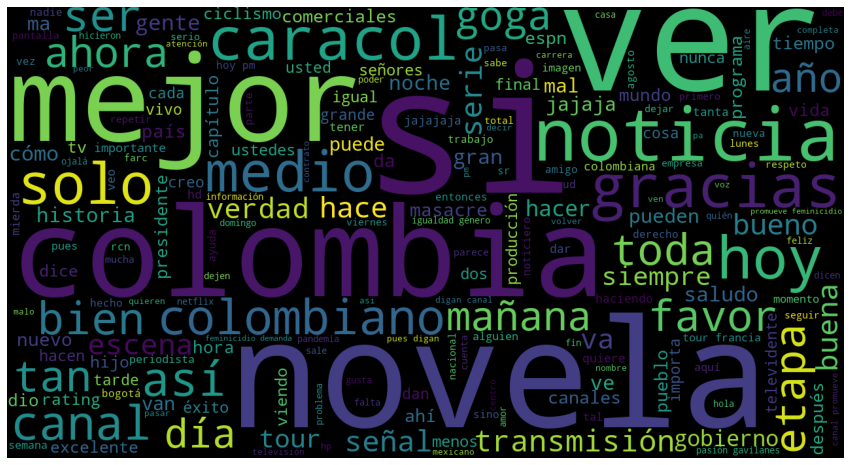

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(txt for txt in df.tweet)
wordcloud = WordCloud(width=1280, height=690).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

Podemos extender el diccionario de stopwords

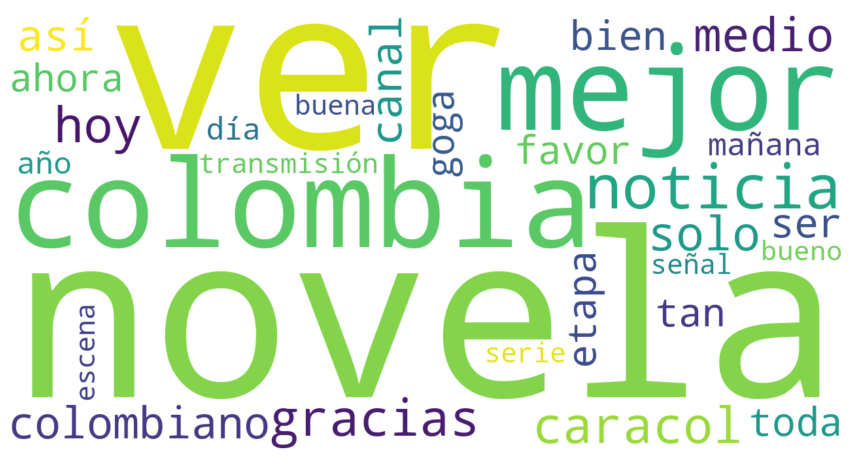

In [22]:
stop.extend(['pues','si'])
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
text = ' '.join(txt for txt in df.tweet)
wordcloud = WordCloud(background_color="white", max_words=30, contour_width=5, contour_color='steelblue', width=1280, height=690)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Eliminar emojis

In [23]:
!pip install emoji

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=c5d80778e3ddcb6a6f6a868fe2ed981dffd0573de573cd2bdc8f459f7b785516
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [24]:
import emoji
def remove_emoji(text):
  return emoji.get_emoji_regexp().sub(r'', text)

In [25]:
df_clean['tweet'][2]

'🚴🏾\u200d♂️gran trabajo ciclistas etapa hoy 🇨🇴 entregándolo final 🇫🇷'

In [26]:
remove_emoji(df_clean['tweet'][2])

'gran trabajo ciclistas etapa hoy  entregándolo final '

In [27]:
df_clean['tweet']=df_clean['tweet'].apply(lambda text: remove_emoji(text))

In [28]:
df_clean.head(10)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez..."
2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'..."
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ..."
5,5,bueno seria volviera programa cine arte vierne...,camilo muete🇨🇴,63,BOGOTA COLOMBIA,0,0,2020-09-01 15:48:05,[],"['CaracolTV', 'LUISCARLOSRUEDA']"
6,6,texto pensé q hablaban testigos auv,Rocio,132,NaN,0,0,2020-09-01 15:43:11,[],"['CaracolTV', 'CaracolPlay']"
7,7,aviones descaro gobierno corre sangre cara cor...,Hector Poveda Moreno,13,NaN,0,0,2020-09-01 15:42:20,[],"['Pfrobledo', 'elespectador', 'CaracolTV', 'Ca..."
8,8,actrices categoría presumen mansiones camionet...,Alexis Gómez,27,Medellin,1,0,2020-09-01 15:39:47,[],"['CaracolTV', 'Regias']"
9,9,medios noticia mueren califica asesinato masac...,Jhonyo,83,"Manhattan, NY",0,0,2020-09-01 15:39:27,[],"['VickyDavilaH', 'CaracolTV', 'CaracolTV']"


In [30]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']"
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez..."
2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'..."
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']"
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ..."


In [34]:
df_clean['user']

0                Karol Mejia
1               Daniel Pérez
2             Ernesto Lucena
3       Lindarys Mejiarobles
4             pensaren plata
                ...         
1823           Juntos Aparte
1824           Juntos Aparte
1825        amalia sandoval.
1826                   Alex.
1827             Marcos Diaz
Name: user, Length: 1828, dtype: object

In [35]:
df.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tweets_clean
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",ven mejor gorditas sé perjuicio delgadez así g...
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez...",saludos ministro
2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'...",gran trabajo ciclistas etapa hoy entregándolo...
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",favor nesesitamos ayuda pasando situación difí...
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ...",ud quiere legalizar mierda ayuda medios afines...


# Tokenización

Es el proceso de dividir el texto en tokens (palabras, bigramas, secuencias...)

In [36]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [48]:
df_clean['tokens'] = df_clean['tweet'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tweets_clean,tokens,tokens_clean
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",[],"[ven, mejor, gorditas, sé, perjuicio, delgadez...","[ven, mejor, gorditas, sé, perjuicio, delgadez..."
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez...",[],"[saludos, ministro]","[saludos, ministro]"
2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'...",[],"[gran, trabajo, ciclistas, etapa, hoy, entregá...","[gran, trabajo, ciclistas, etapa, hoy, entregá..."
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",[],"[favor, nesesitamos, ayuda, pasando, situación...","[favor, nesesitamos, ayuda, pasando, situación..."
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ...",[],"[ud, quiere, legalizar, mierda, ayuda, medios,...","[ud, quiere, legalizar, mierda, ayuda, medios,..."


In [45]:
df_clean['tokens_clean']=df_clean['tokens']
df_clean['tokens_clean']=df_clean['tokens_clean'].apply(lambda text: [word for word in text if word.isalnum() and len(word)>1])

## Frecuencia de palabras
Después de quitar los stopwords, procemos a calcular la frecuencia de palablas

In [41]:
import itertools
import collections

In [49]:
all_words = list(itertools.chain(*df_clean['tokens_clean']))

In [50]:
counts_words = collections.Counter(all_words)
mostcommon_words=counts_words.most_common(35)
mostcommon_words

[('ver', 97),
 ('hoy', 82),
 ('colombia', 80),
 ('mejor', 74),
 ('canal', 73),
 ('novela', 71),
 ('gracias', 66),
 ('caracol', 65),
 ('señal', 57),
 ('así', 56),
 ('solo', 53),
 ('tour', 47),
 ('favor', 46),
 ('etapa', 44),
 ('medios', 44),
 ('tan', 42),
 ('bien', 41),
 ('gran', 41),
 ('ser', 41),
 ('goga', 41),
 ('hace', 41),
 ('escenas', 40),
 ('noticias', 39),
 ('ahora', 37),
 ('tv', 36),
 ('capítulo', 36),
 ('programa', 35),
 ('día', 35),
 ('mañana', 34),
 ('transmisión', 33),
 ('colombianos', 32),
 ('años', 31),
 ('am', 31),
 ('verdad', 31),
 ('siempre', 30)]

## Frecuencia de bigramas

In [51]:
from nltk import bigrams
import networkx as nx
from nltk.util import ngrams

In [52]:
text

'ven mejor gorditas sé perjuicio delgadez así gorditas ven bien saludos ministro gran trabajo ciclistas etapa hoy  entregándolo final  favor nesesitamos ayuda pasando situación difícil comida niños ayudennos favor nesesitamos alimentacion  ud quiere legalizar mierda ayuda medios afines terrorismo tal párese fabulosa información sesgada terrorismo bueno seria volviera programa cine arte viernes noche siempre habia nueva película ver mejor conduzca experto cine texto pensé q hablaban testigos auv aviones descaro gobierno corre sangre cara corre campos actrices categoría presumen mansiones camionetas trabajan hollywood medios noticia mueren califica asesinato masacre medios politizados idiogilizados peor asesinato heroes noticia importancia asco produce estan jodidos tipo noticias absurdas ve tv    hibinomuguruza  pleno pico pandemia país vuelto mierda corrupción gobierno instituciones desempleo pobreza doquier uds publicando mierda noticias nadie importan faranduleros mierda talante séqu

In [53]:
terms_bigram = [list(nltk.bigrams(t)) for t in df_clean.tokens]

In [54]:
bigramsList = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigramsList)
bigram_counts.most_common(15)

[(('tour', 'francia'), 15),
 (('hoy', 'pm'), 14),
 (('igualdad', 'género'), 12),
 (('pasión', 'gavilanes'), 12),
 (('digan', 'canal'), 11),
 (('canal', 'promueve'), 11),
 (('promueve', 'feminicidio'), 11),
 (('feminicidio', 'demanda'), 11),
 (('demanda', 'secretaría'), 11),
 (('secretaría', 'mujer'), 11),
 (('mujer', 'pondría'), 11),
 (('pondría', 'mismo'), 11),
 (('mismo', 'claro'), 11),
 (('claro', 'dejan'), 11),
 (('dejan', 'correr'), 11)]

In [55]:
bigram_df = pd.DataFrame(bigram_counts.most_common(50),columns=['bigram', 'count'])

In [56]:
d = bigram_df.set_index('bigram').T.to_dict('records')

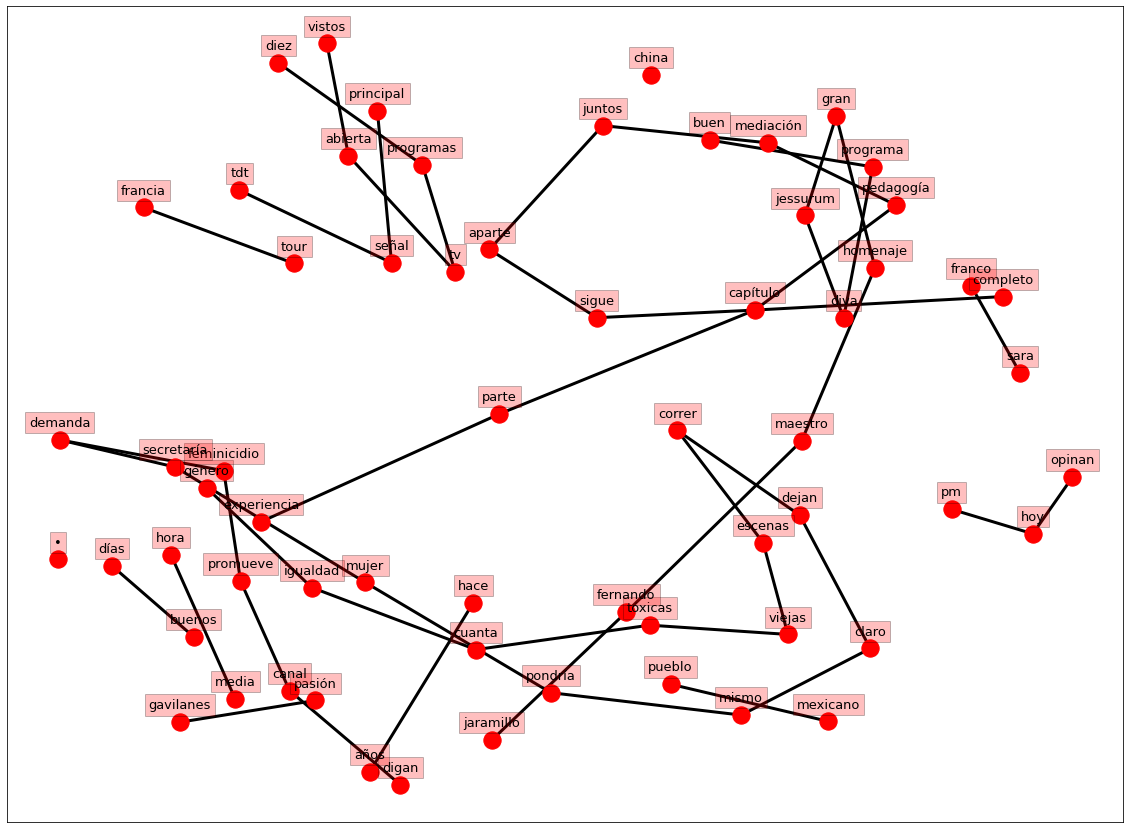

In [69]:
G = nx.Graph()
# Conecciones entre los nodos
for k, v in d[0].items():
  G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(G, k=2)
nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='black',node_color='red',with_labels = False,ax=ax)
for key, value in pos.items():
  x, y = value[0], value[1]+.035
  ax.text(x, y, s=key, bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)    
plt.show()

# Lematización (Lemmatization)
Es la acción de identificar en el texto, dada una forma flexionada, el lema correspondiente. 

Se entiende como forma flexionada de una palabra, el plural, femenino, o conjugación de un verbo.

El lema es la forma que representa todas las formas flexionadas de una misma palabra. 

Por ejemplo, el lema de una conjugación de un verbo es el verbo en infinitivo. De un sustantivo en plural, es el sustantivo en singular y masculino.

In [70]:
import spacy
!python -m spacy download es_core_news_sm # Descarga el modelo del lenguaje

     |████████████████████████████████| 16.2MB 1.7MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172934 sha256=cf82bbb5dcc027484bdc76e851ca42bfeb4548cbeebfd7af5e1953953f5dc498
  Stored in directory: /tmp/pip-ephem-wheel-cache-nx8l6e59/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [71]:
import es_core_news_sm
nlp = es_core_news_sm.load()

La descripción de las diferentes abreviaturas la puede encontrar en: https://spacy.io/api/annotation#pos-tagging

In [72]:
print(df_clean.tweet[0])
d=nlp(df_clean.tweet[0])
t=[[tok.text,tok.lemma_,tok.pos_,tok.ent_type_] for tok in d]
t

ven mejor gorditas sé perjuicio delgadez así gorditas ven bien


[['ven', 'ver', 'VERB', ''],
 ['mejor', 'mejor', 'ADV', ''],
 ['gorditas', 'gorditas', 'NOUN', ''],
 ['sé', 'ser', 'VERB', ''],
 ['perjuicio', 'perjuicio', 'NOUN', ''],
 ['delgadez', 'delgadez', 'VERB', ''],
 ['así', 'asir', 'ADV', ''],
 ['gorditas', 'gorditas', 'ADJ', ''],
 ['ven', 'ver', 'VERB', ''],
 ['bien', 'bien', 'ADV', '']]

Por ejemplo, detectar los sustantivos en un texto

In [73]:
for noun in d.noun_chunks:
  print(noun.text)

gorditas
perjuicio


In [74]:
df_clean['lemmas'] = df_clean.tweet.apply(lambda text: [tok.lemma_ for tok in nlp(text)])
df_clean.head()

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tweets_clean,tokens,tokens_clean,lemmas
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",[],"[ven, mejor, gorditas, sé, perjuicio, delgadez...","[ven, mejor, gorditas, sé, perjuicio, delgadez...","[ver, mejor, gorditas, ser, perjuicio, delgade..."
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez...",[],"[saludos, ministro]","[saludos, ministro]","[saludo, ministro]"
2,2,gran trabajo ciclistas etapa hoy entregándolo...,Ernesto Lucena,10822,NaN,4,0,2020-09-01 15:55:30,['TourDeFrancia'],"['NairoQuinCo', 'SupermanlopezN', 'Eganbernal'...",[],"[gran, trabajo, ciclistas, etapa, hoy, entregá...","[gran, trabajo, ciclistas, etapa, hoy, entregá...","[gran, trabajar, ciclista, etapa, hoy, , entr..."
3,3,favor nesesitamos ayuda pasando situación difí...,Lindarys Mejiarobles,48,"Bogotá, D.C., Colombia",0,0,2020-09-01 15:53:57,[],"['CaracolTV', 'Regias']",[],"[favor, nesesitamos, ayuda, pasando, situación...","[favor, nesesitamos, ayuda, pasando, situación...","[favor, nesesitamos, ayudar, pasar, situación,..."
4,4,ud quiere legalizar mierda ayuda medios afines...,pensaren plata,126,Colombia,0,0,2020-09-01 15:50:59,[],"['CarlosFGalan', 'COL_EJERCITO', 'CaracolTV', ...",[],"[ud, quiere, legalizar, mierda, ayuda, medios,...","[ud, quiere, legalizar, mierda, ayuda, medios,...","[ud, querer, legalizar, mierda, ayudar, medio,..."


In [75]:
allWords=[]
for l in df_clean.lemmas:
  allWords.extend(l)
wordDist = nltk.FreqDist(allWords)
wordDist.most_common(15)

[('ver', 222),
 ('hacer', 165),
 (' ', 122),
 ('poder', 107),
 ('dar', 100),
 ('canal', 98),
 ('novelar', 97),
 ('bueno', 96),
 ('decir', 94),
 ('ir', 87),
 ('hoy', 82),
 ('colombia', 80),
 ('mejor', 74),
 ('ser', 67),
 ('dejar', 67)]

Algo interesante de este módulo es si usamos la frase completa, es capaz de hacer el análisis completo de la oración y podemos visualizar el gráfico de dependencias.

La lista de depndencias pueden verla aquí: 
https://universaldependencies.org/u/dep/index.html

In [76]:
ejemploOracion = nlp('El curso de analítica de datos de la Universidad EIA de la profesora Isis tiene un grupo de estudiantes muy brillantes')
spacy.displacy.render(ejemploOracion, style='dep', jupyter=True, options={'distance': 90})

Identificación de la entidades en el texto: 

En este ejemplo reconoce Persona: Isis y Organización: Universidad EIA

In [77]:
[(e,  e.label_) for e in ejemploOracion.ents]

[(Universidad EIA, 'ORG'), (Isis, 'PER')]

# Radicalización (Stemming)
Stremming es el proceso de llevar las palabras a su forma raíz.

Después de dividido el texto en palabras, pasamos a hacer el stemming. Para hacerlo en idioma español debemos usar la librería SnowballStemmer, que permite varios lenguajes además del inglés.

In [78]:
from nltk.stem import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer ## Para poder hacerlo con idiomas diferentes al inglés

In [79]:
stemmer_spanish = SnowballStemmer("spanish")

In [80]:
df_clean['tokens_stem'] = df_clean['tokens'].apply(lambda text: [s for s in [stemmer_spanish.stem(i) for i in text] if s.isalpha() and len(s) > 1])

In [81]:
df_clean.head(2)

,Unnamed: 0,tweet,user,user_followers,user_location,fav_count,rt_count,tweet_date,hashtags,mentions,tweets_clean,tokens,tokens_clean,lemmas,tokens_stem
0,0,ven mejor gorditas sé perjuicio delgadez así g...,Karol Mejia,230,Colombia,0,0,2020-09-01 15:59:14,[],"['CaracolTV', 'Regias']",[],"[ven, mejor, gorditas, sé, perjuicio, delgadez...","[ven, mejor, gorditas, sé, perjuicio, delgadez...","[ver, mejor, gorditas, ser, perjuicio, delgade...","[ven, mejor, gordit, se, perjuici, delgadez, a..."
1,1,saludos ministro,Daniel Pérez,72144,"Bogota, Colombia",2,0,2020-09-01 15:56:46,['CiclismoEntreGrandes'],"['LucenErnesto', 'NairoQuinCo', 'Supermanlopez...",[],"[saludos, ministro]","[saludos, ministro]","[saludo, ministro]","[salud, ministr]"


In [82]:
df_clean.to_csv(path+'CaracolTV_Clean.csv', encoding='utf-8-sig')

In [83]:
path='/content/drive/My Drive/Analitics_Esp/'
df = pd.read_csv(path+'CaracolTV_Clean.csv', encoding='utf-8-sig')

## Bag of Words

In [84]:
import gensim
from gensim import corpora
import numpy as np

In [85]:
words=[]
for w in df.lemmas:
  words.append(w)

In [86]:
words

["['ver', 'mejor', 'gorditas', 'ser', 'perjuicio', 'delgadez', 'asir', 'gorditas', 'ver', 'bien']",
 "['saludo', 'ministro']",
 "['gran', 'trabajar', 'ciclista', 'etapa', 'hoy', ' ', 'entregándolo', 'final']",
 "['favor', 'nesesitamos', 'ayudar', 'pasar', 'situación', 'difícil', 'comer', 'niño', 'ayudennos', 'favor', 'nesesitamos', 'alimentacion']",
 "['ud', 'querer', 'legalizar', 'mierda', 'ayudar', 'medio', 'afinar', 'terrorismo', 'tal', 'párese', 'fabuloso', 'información', 'sesgar', 'terrorismo']",
 "['bueno', 'serio', 'volver', 'programar', 'cine', 'arte', 'viernes', 'noche', 'siempre', 'habia', 'nuevo', 'película', 'ver', 'mejor', 'conducir', 'experto', 'cine']",
 "['texto', 'pensar', 'q', 'hablar', 'testigo', 'auv']",
 "['avión', 'descarar', 'gobernar', 'correr', 'sangrar', 'caro', 'correr', 'campo']",
 "['actriz', 'categoría', 'presumir', 'mansión', 'camioneta', 'trabajar', 'hollywood']",
 "['medio', 'noticiar', 'morir', 'calificar', 'asesinato', 'masacrar', 'medio', 'politizar'

In [87]:
dic=corpora.Dictionary([words])

In [88]:
bow_corpus = [dic.doc2bow([w]) for w in words]

Crear un modelo para clasificar el texto

In [91]:
lda_model = gensim.models.LdaMulticore(bow_corpus,num_topics = 4, id2word = dic, passes = 20)
lda_model.show_topics()

[(0,
  '0.004*"[\'mirar\']" + 0.003*"[\'serio\', \'congelar\', \'imagen\']" + 0.003*"[\'hoy\', \'ver\', \'negligencia\', \'fatal\', \'investigación\', \'denunciar\', \'padre\', \'familia\', \'clínico\', \'salud\', \'mental\', \'maltratar\', \'abuso\', \'negligencia\', \'invitar\', \'conectarse\', \'señal\', \'esperar\']" + 0.003*"[\' \', \'budapest\', \'iniciar\', \'edición\', \'virtual\', \'personar\', \'acreditar\', \'entrar\', \'conferenciar\', \'destacar\', \'focalizar\', \'mercar\', \'reunir\', \'ejecutivo\', \'mbc\']" + 0.003*"[\'importar\']" + 0.003*"[\'diez\', \'programar\', \'tv\', \'abrir\', \'ver\', \'ayer\', \'lunes\', \'fuente\']" + 0.003*"[\'sera\']" + 0.003*"[\' \', \'venganza\', \'analía\', \'llegar\', \'mañana\', \'lo\', \'producción\', \'original\', \'lideraró\', \'primar\', \'timar\', \'emisión\', \'registrar\', \'millón\', \'televidente\', \'diario\']" + 0.003*"[\'asir\']" + 0.001*"[\'caracol\', \'muchacho\', \'ver\', \'ahí\', \'talentoso\', \'hermosísima\']"'),
 (1

In [92]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=b672b75b51414b106725b56df5e91298f8991638462da0df0821eef851c5f075
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [93]:
import pyLDAvis.gensim

In [94]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.107817  0.046638       1        1  25.763928
1     -0.082595  0.081515       2        1  25.082178
2     -0.014865 -0.083627       3        1  24.781512
0     -0.010358 -0.044527       4        1  24.372382, topic_info=                                                   Term  ...  loglift
427   ['decir', 'canal', 'promover', 'feminicidio', ...  ...  30.0000
600   ['experiencia', 'partir', 'capítulo', 'pedagog...  ...  29.0000
232   ['bueno', 'programar', 'divo', 'jessurum', 'gr...  ...  28.0000
1746  ['vosotros', 'decir', 'permiso', 'llegar', 'ba...  ...  27.0000
1763                                                 []  ...  26.0000
...                                                 ...  ...      ...
1030  ['mañana', 'llover', 'ojo', 'q', 'mañana', 'po...  ...   0.9411
1592            ['sres', 'decir', 'masacre', 'masacre']  ...   0.9411
1110  ['mujer', 'exigir', 'igualdad', 'generar', 'me...  ...   0.9411
318   ['comenzar', 'segundar', 'etapa', 'nizaniza', ...  ...   0.9411
958                      ['llamar', 'vecino', 'amigar']  ...   0.9411

[152 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
3         4  0.654792  [' ', 'budapest', 'iniciar', 'edición', 'virtu...
11        1  0.655226  [' ', 'estrenar', 'venganza', 'analía', 'éxito...
18        4  0.654792  [' ', 'venganza', 'analía', 'llegar', 'mañana'...
24        2  0.982524  ['acabar', 'cuarentena', 'obligatorio', 'media...
28        4  0.982263             ['acabar', 'subir', 'escena', 'volar']
...     ...       ...                                                ...
1711      1  0.655226                                            ['ver']
1715      4  0.982263  ['verdad', 'mostrar', 'positivismo', 'colombia...
1746      1  0.982927  ['vosotros', 'decir', 'permiso', 'llegar', 'ba...
1750      4  0.982263  ['ví', 'mesar', 'horario', 'apenar', 'enterar'...
1763      3  0.785892                                                 []

[122 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])